# Animal Crossing Tom Nook Store Project

### URL for Source Below

https://www.kaggle.com/code/ampiiere/animal-crossing-villager-popularity-analysis/notebook

https://www.kaggle.com/datasets/prasertk/animal-crossing-new-horizons-with-image-url

# Introduction

In [21]:
# Tom Nook, a known Animal Crossing character who is a Retail Store Owner, wants to get know his target audience. 
# Tom nook sells Accessories, Furniture, Wallpaper, Flooring, Gardening supplies, and seasonal items
# He is planning on future furniture purchases for retail value but wants to coordinate the purchases based on demand 
# He needs your help to analyze the lifestyles, purchase histories, species, gender, etc. of these villagers 
# This information will also help him to maintain his competitive edge against competitors like Crazy Redd and Saharah.
# Keep in mind the currency used in Animal Crossing are Bells


In [85]:
# Carlos - note: Making furniture purchases based on the demand of the villagers 
# will have to also come from what the villagers have previously purchased too
# I don't have access to Furniture or other revenue nor company expenditures data
# I notice the villagers have wallpapers and floors. 
# We should base furniture purchases based on the wallpaper and floor purchases sold by Tom Nook
# Our goal is to consult what complementary furniture to sell 
# There is a possibility that The villagers ideals are to buy furniture relevant to the interior design

In [4]:
import numpy as np  # data processing
import matplotlib.pyplot as plt # Data visualization library
import seaborn as sns # Data visualization library
import pandas as pd # read files and data processing 

In [5]:
vlgr_df=pd.read_csv(r"C:\Users\carlo\OneDrive\Documents\My Data Analytics Projects\Animal Crossing\Animal Crossing Tom Nook Business Project\Raw Data\villagers (1).csv")

In [6]:
vlgr_df

,Name,Species,Gender,Personality,Hobby,Birthday,Catchphrase,Favorite Song,Style 1,Style 2,Color 1,Color 2,Wallpaper,Flooring,Furniture List,Filename,Unique Entry ID
0,Admiral,Bird,Male,Cranky,Nature,27-Jan,aye aye,Steep Hill,Cool,Cool,Black,Blue,dirt-clod wall,tatami,717;1849;7047;2736;787;5970;3449;3622;3802;410...,brd06,B3RyfNEqwGmcccRC3
1,Agent S,Squirrel,Female,Peppy,Fitness,2-Jul,sidekick,Go K.K. Rider,Active,Simple,Blue,Black,concrete wall,colorful tile flooring,7845;7150;3468;4080;290;3971;3449;1708;4756;25...,squ05,SGMdki6dzpDZyXAw5
2,Agnes,Pig,Female,Big Sister,Play,21-Apr,snuffle,K.K. House,Simple,Elegant,Pink,White,gray molded-panel wall,arabesque flooring,4129;7236;7235;7802;896;3428;4027;7325;3958;71...,pig17,jzWCiDPm9MqtCfecP
3,Al,Gorilla,Male,Lazy,Fitness,18-Oct,ayyyeee,Go K.K. Rider,Active,Active,Red,White,concrete wall,green rubber flooring,1452;4078;4013;833;4116;3697;7845;3307;3946;39...,gor08,LBifxETQJGEaLhBjC
4,Alfonso,Alligator,Male,Lazy,Play,9-Jun,it'sa me,Forest Life,Simple,Simple,Red,Blue,yellow playroom wall,green honeycomb tile,4763;3205;3701;1557;3623;85;3208;3584;4761;121...,crd00,REpd8KxB8p9aGBRSE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,Winnie,Horse,Female,Peppy,Fashion,31-Jan,hay-OK,K.K. Country,Cool,Simple,White,Gray,backyard-fence wall,backyard lawn,1626;1626;5970;4003;3509;1620;1627;3467;1631;1...,hrs05,b4HwfyvThyipScSAv
387,Wolfgang,Wolf,Male,Cranky,Education,25-Nov,snarrrl,K.K. D&B,Cool,Active,Black,Green,dark wooden-mosaic wall,stripe flooring,4117;7323;7323;3275;4109;3270;3196;4338;3200;3...,wol02,RbF2wcn6jRxtgLDRd
388,Yuka,Koala,Female,Snooty,Fashion,20-Jul,tsk tsk,Soulful K.K.,Cool,Elegant,Orange,Yellow,beige art-deco wall,simple purple flooring,3957;3955;2554;3974;3951;794;4106;3959;3958;997,kal00,QDcxk3dCNT6yeD9hk
389,Zell,Deer,Male,Smug,Music,7-Jun,pronk,K.K. Swing,Cool,Gorgeous,Purple,Gray,cityscape wall,monochromatic tile flooring,1875;863;4129;4053;4053;3951;794;3775;4046;423...,der02,LodBWtdMRZbjFNga9


In [7]:
wallpaper_df=pd.read_csv(r"C:\Users\carlo\OneDrive\Documents\My Data Analytics Projects\Animal Crossing\Animal Crossing Tom Nook Business Project\Raw Data\wallpaper.csv")

In [8]:
wallpaper_df

,Name,VFX,VFX Type,DIY,Buy,Sell,Color 1,Color 2,Miles Price,Source,...,Curtain Color,Ceiling Type,HHA Concept 1,HHA Concept 2,HHA Series,Tag,Version,Filename,Internal ID,Unique Entry ID
0,abstract wall,No,NaN,No,1560,390.0,White,Colorful,NaN,Nook's Cranny,...,White,Cloth,shop,facility,None,Cloth Walls,1.0.0,RoomTexWallAbstract00,4873,FpdbDr4PMe5WdEZkA
1,ancient wall,No,NaN,No,3000,750.0,Beige,Brown,NaN,Saharah,...,NaN,Stone,folk art,horror,None,Asia,1.0.0,RoomTexWallEgypt00,4936,Y2pykQMhqbEoGGa62
2,apple wall,No,NaN,Yes,NFS,4000.0,Red,Red,NaN,Crafting,...,White,Cloth,fancy,child's room,fruits,Fruit Walls,1.0.0,RoomTexWallApple00,4916,roJZFWataeLQK6vqa
3,aqua tile wall,No,NaN,No,1420,355.0,Light blue,Light blue,NaN,Nook's Cranny,...,White Plastic,Stone,bathroom,facility,None,Tile Walls,1.0.0,RoomTexWallTile01,4930,6NXvjsdpxJLbd96RM
4,arched-window wall,Yes,NaN,No,2150,537.0,Brown,Light blue,NaN,Nook's Cranny,...,NaN,Wood,shop,expensive,None,Special Walls,1.0.0,RoomSpWallGlass00,5482,TzS5oe6a7KyBezmLS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,yellow playroom wall,No,NaN,No,2540,635.0,Yellow,Yellow,NaN,Nook's Cranny,...,NaN,Cloth,child's room,fancy,None,Toy Walls,1.0.0,RoomTexWallToy03,6865,mraytANoYBQvA8qAk
243,yellow quilt wall,No,NaN,No,2150,537.0,Yellow,White,NaN,Nook's Cranny,...,White Lace,Wood,fancy,child's room,None,Dollhouse Walls,1.0.0,RoomTexWallDollhouse02,7276,ysEdh2vpCpg5qBcNg
244,yellow simple-cloth wall,No,NaN,No,750,187.0,Beige,Yellow,NaN,Nook's Cranny,...,White,Stone,child's room,living room,None,Simple Walls,1.0.0,RoomTexWallSimple01,4867,7sSXFNqcYgPMcGY8k
245,yellow-paint wall,No,NaN,No,1600,400.0,Yellow,Yellow,NaN,Nook's Cranny,...,NaN,Cloth,fancy,child's room,None,Stucco Walls,1.0.0,RoomTexWallStucco00,4808,TySAA4kKqyvGGeZ5C


In [9]:
wallpaper_df=wallpaper_df.rename(columns={'Name':'Wallpaper'})

In [10]:
wallpaper_df

,Wallpaper,VFX,VFX Type,DIY,Buy,Sell,Color 1,Color 2,Miles Price,Source,...,Curtain Color,Ceiling Type,HHA Concept 1,HHA Concept 2,HHA Series,Tag,Version,Filename,Internal ID,Unique Entry ID
0,abstract wall,No,NaN,No,1560,390.0,White,Colorful,NaN,Nook's Cranny,...,White,Cloth,shop,facility,None,Cloth Walls,1.0.0,RoomTexWallAbstract00,4873,FpdbDr4PMe5WdEZkA
1,ancient wall,No,NaN,No,3000,750.0,Beige,Brown,NaN,Saharah,...,NaN,Stone,folk art,horror,None,Asia,1.0.0,RoomTexWallEgypt00,4936,Y2pykQMhqbEoGGa62
2,apple wall,No,NaN,Yes,NFS,4000.0,Red,Red,NaN,Crafting,...,White,Cloth,fancy,child's room,fruits,Fruit Walls,1.0.0,RoomTexWallApple00,4916,roJZFWataeLQK6vqa
3,aqua tile wall,No,NaN,No,1420,355.0,Light blue,Light blue,NaN,Nook's Cranny,...,White Plastic,Stone,bathroom,facility,None,Tile Walls,1.0.0,RoomTexWallTile01,4930,6NXvjsdpxJLbd96RM
4,arched-window wall,Yes,NaN,No,2150,537.0,Brown,Light blue,NaN,Nook's Cranny,...,NaN,Wood,shop,expensive,None,Special Walls,1.0.0,RoomSpWallGlass00,5482,TzS5oe6a7KyBezmLS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,yellow playroom wall,No,NaN,No,2540,635.0,Yellow,Yellow,NaN,Nook's Cranny,...,NaN,Cloth,child's room,fancy,None,Toy Walls,1.0.0,RoomTexWallToy03,6865,mraytANoYBQvA8qAk
243,yellow quilt wall,No,NaN,No,2150,537.0,Yellow,White,NaN,Nook's Cranny,...,White Lace,Wood,fancy,child's room,None,Dollhouse Walls,1.0.0,RoomTexWallDollhouse02,7276,ysEdh2vpCpg5qBcNg
244,yellow simple-cloth wall,No,NaN,No,750,187.0,Beige,Yellow,NaN,Nook's Cranny,...,White,Stone,child's room,living room,None,Simple Walls,1.0.0,RoomTexWallSimple01,4867,7sSXFNqcYgPMcGY8k
245,yellow-paint wall,No,NaN,No,1600,400.0,Yellow,Yellow,NaN,Nook's Cranny,...,NaN,Cloth,fancy,child's room,None,Stucco Walls,1.0.0,RoomTexWallStucco00,4808,TySAA4kKqyvGGeZ5C


In [11]:
flooring_df=pd.read_csv(r"C:\Users\carlo\OneDrive\Documents\My Data Analytics Projects\Animal Crossing\Animal Crossing Tom Nook Business Project\Raw Data\floors.csv")

In [12]:
flooring_df=flooring_df.rename(columns={'Name':'Flooring'})

In [13]:
flooring_df

,Flooring,VFX,DIY,Buy,Sell,Color 1,Color 2,Miles Price,Source,Source Notes,Version,HHA Concept 1,HHA Concept 2,HHA Series,Tag,Catalog,Filename,Internal ID,Unique Entry ID
0,aqua tile flooring,No,No,900,225,Light blue,Light blue,NaN,Nook's Cranny,NaN,1.0.0,bathroom,facility,None,Tile Floors,For sale,RoomTexFloorTile01,5036,JmNGqRhEow3PH7bgk
1,arabesque flooring,No,No,2120,530,Black,Gray,NaN,Nook's Cranny,NaN,1.0.0,expensive,living room,None,Cloth Floors,For sale,RoomTexFloorArabesque00,4953,4dabyuetmZD5dDdCH
2,arched-brick flooring,No,No,1100,275,Brown,Brown,NaN,Nook's Cranny,NaN,1.0.0,facility,shop,None,Arched Brick,For sale,RoomTexFloorArchBrick00,4998,CSPoYJzCnzWjqWrj5
3,argyle tile flooring,No,No,1750,437,White,Beige,NaN,Nook's Cranny,NaN,1.0.0,bathroom,facility,None,Tile Floors,For sale,RoomTexFloorTileWood00,4994,BH8PqRSou2XjQ8ppQ
4,artsy parquet flooring,No,No,1800,450,Beige,Beige,NaN,Nook's Cranny,NaN,1.0.0,facility,shop,None,Simple Parquet,For sale,RoomTexFloorParquetArt00,5232,fbfCzw546bWEF95Aq
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,white-paint flooring,No,No,1040,260,White,White,NaN,Nook's Cranny,NaN,1.0.0,living room,child's room,None,Painted Wood,For sale,RoomTexFloorPaintWood03,5060,JdnrGbAMW7FBxrw5P
172,wildflower meadow,No,No,3000,750,Green,Green,NaN,Saharah,NaN,1.0.0,garden,fancy,None,Grassland,Not for sale,RoomTexFloorGrassland01,5006,dYb6DAfZQJTGN7svs
173,wooden-knot flooring,No,No,780,195,Brown,Brown,NaN,Nook's Cranny,NaN,1.0.0,living room,child's room,None,Wood Floors,For sale,RoomTexFloorCedar00,5049,ttyLLQ39Dc3fK32JE
174,yellow floral flooring,No,No,1520,380,Yellow,Yellow,NaN,Nook's Cranny,NaN,1.0.0,shop,living room,None,Deco Wood,For sale,RoomTexFloorDecoWood00,5073,R69sMEPHQGu7fBzuQ


In [14]:
vlgr_df.head()

,Name,Species,Gender,Personality,Hobby,Birthday,Catchphrase,Favorite Song,Style 1,Style 2,Color 1,Color 2,Wallpaper,Flooring,Furniture List,Filename,Unique Entry ID
0,Admiral,Bird,Male,Cranky,Nature,27-Jan,aye aye,Steep Hill,Cool,Cool,Black,Blue,dirt-clod wall,tatami,717;1849;7047;2736;787;5970;3449;3622;3802;410...,brd06,B3RyfNEqwGmcccRC3
1,Agent S,Squirrel,Female,Peppy,Fitness,2-Jul,sidekick,Go K.K. Rider,Active,Simple,Blue,Black,concrete wall,colorful tile flooring,7845;7150;3468;4080;290;3971;3449;1708;4756;25...,squ05,SGMdki6dzpDZyXAw5
2,Agnes,Pig,Female,Big Sister,Play,21-Apr,snuffle,K.K. House,Simple,Elegant,Pink,White,gray molded-panel wall,arabesque flooring,4129;7236;7235;7802;896;3428;4027;7325;3958;71...,pig17,jzWCiDPm9MqtCfecP
3,Al,Gorilla,Male,Lazy,Fitness,18-Oct,ayyyeee,Go K.K. Rider,Active,Active,Red,White,concrete wall,green rubber flooring,1452;4078;4013;833;4116;3697;7845;3307;3946;39...,gor08,LBifxETQJGEaLhBjC
4,Alfonso,Alligator,Male,Lazy,Play,9-Jun,it'sa me,Forest Life,Simple,Simple,Red,Blue,yellow playroom wall,green honeycomb tile,4763;3205;3701;1557;3623;85;3208;3584;4761;121...,crd00,REpd8KxB8p9aGBRSE


In [15]:
wallpaper_df.head()

,Wallpaper,VFX,VFX Type,DIY,Buy,Sell,Color 1,Color 2,Miles Price,Source,...,Curtain Color,Ceiling Type,HHA Concept 1,HHA Concept 2,HHA Series,Tag,Version,Filename,Internal ID,Unique Entry ID
0,abstract wall,No,NaN,No,1560,390.0,White,Colorful,NaN,Nook's Cranny,...,White,Cloth,shop,facility,None,Cloth Walls,1.0.0,RoomTexWallAbstract00,4873,FpdbDr4PMe5WdEZkA
1,ancient wall,No,NaN,No,3000,750.0,Beige,Brown,NaN,Saharah,...,NaN,Stone,folk art,horror,None,Asia,1.0.0,RoomTexWallEgypt00,4936,Y2pykQMhqbEoGGa62
2,apple wall,No,NaN,Yes,NFS,4000.0,Red,Red,NaN,Crafting,...,White,Cloth,fancy,child's room,fruits,Fruit Walls,1.0.0,RoomTexWallApple00,4916,roJZFWataeLQK6vqa
3,aqua tile wall,No,NaN,No,1420,355.0,Light blue,Light blue,NaN,Nook's Cranny,...,White Plastic,Stone,bathroom,facility,None,Tile Walls,1.0.0,RoomTexWallTile01,4930,6NXvjsdpxJLbd96RM
4,arched-window wall,Yes,NaN,No,2150,537.0,Brown,Light blue,NaN,Nook's Cranny,...,NaN,Wood,shop,expensive,None,Special Walls,1.0.0,RoomSpWallGlass00,5482,TzS5oe6a7KyBezmLS


In [16]:
flooring_df.head()

,Flooring,VFX,DIY,Buy,Sell,Color 1,Color 2,Miles Price,Source,Source Notes,Version,HHA Concept 1,HHA Concept 2,HHA Series,Tag,Catalog,Filename,Internal ID,Unique Entry ID
0,aqua tile flooring,No,No,900,225,Light blue,Light blue,NaN,Nook's Cranny,NaN,1.0.0,bathroom,facility,None,Tile Floors,For sale,RoomTexFloorTile01,5036,JmNGqRhEow3PH7bgk
1,arabesque flooring,No,No,2120,530,Black,Gray,NaN,Nook's Cranny,NaN,1.0.0,expensive,living room,None,Cloth Floors,For sale,RoomTexFloorArabesque00,4953,4dabyuetmZD5dDdCH
2,arched-brick flooring,No,No,1100,275,Brown,Brown,NaN,Nook's Cranny,NaN,1.0.0,facility,shop,None,Arched Brick,For sale,RoomTexFloorArchBrick00,4998,CSPoYJzCnzWjqWrj5
3,argyle tile flooring,No,No,1750,437,White,Beige,NaN,Nook's Cranny,NaN,1.0.0,bathroom,facility,None,Tile Floors,For sale,RoomTexFloorTileWood00,4994,BH8PqRSou2XjQ8ppQ
4,artsy parquet flooring,No,No,1800,450,Beige,Beige,NaN,Nook's Cranny,NaN,1.0.0,facility,shop,None,Simple Parquet,For sale,RoomTexFloorParquetArt00,5232,fbfCzw546bWEF95Aq


## 1. Checking for Null values

In [17]:
vlgr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name             391 non-null    object
 1   Species          391 non-null    object
 2   Gender           391 non-null    object
 3   Personality      391 non-null    object
 4   Hobby            391 non-null    object
 5   Birthday         391 non-null    object
 6   Catchphrase      391 non-null    object
 7   Favorite Song    391 non-null    object
 8   Style 1          391 non-null    object
 9   Style 2          391 non-null    object
 10  Color 1          391 non-null    object
 11  Color 2          391 non-null    object
 12  Wallpaper        391 non-null    object
 13  Flooring         391 non-null    object
 14  Furniture List   391 non-null    object
 15  Filename         391 non-null    object
 16  Unique Entry ID  391 non-null    object
dtypes: object(17)
memory usage: 52.1+ K

In [18]:
wallpaper_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Wallpaper        247 non-null    object 
 1   VFX              247 non-null    object 
 2   VFX Type         25 non-null     object 
 3   DIY              247 non-null    object 
 4   Buy              247 non-null    object 
 5   Sell             247 non-null    float64
 6   Color 1          247 non-null    object 
 7   Color 2          247 non-null    object 
 8   Miles Price      1 non-null      float64
 9   Source           247 non-null    object 
 10  Source Notes     0 non-null      float64
 11  Catalog          247 non-null    object 
 12  Window Type      247 non-null    object 
 13  Window Color     147 non-null    object 
 14  Pane Type        147 non-null    object 
 15  Curtain Type     247 non-null    object 
 16  Curtain Color    98 non-null     object 
 17  Ceiling Type    

In [19]:
flooring_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Flooring         176 non-null    object 
 1   VFX              173 non-null    object 
 2   DIY              176 non-null    object 
 3   Buy              176 non-null    object 
 4   Sell             176 non-null    int64  
 5   Color 1          176 non-null    object 
 6   Color 2          176 non-null    object 
 7   Miles Price      1 non-null      float64
 8   Source           176 non-null    object 
 9   Source Notes     0 non-null      float64
 10  Version          176 non-null    object 
 11  HHA Concept 1    176 non-null    object 
 12  HHA Concept 2    176 non-null    object 
 13  HHA Series       176 non-null    object 
 14  Tag              176 non-null    object 
 15  Catalog          176 non-null    object 
 16  Filename         176 non-null    object 
 17  Internal ID     

## 2. Checking for mismatched names

In [20]:
wallpaper_df['Wallpaper'].isin(vlgr_df['Wallpaper']).sum()

154

In [21]:
flooring_df['Flooring'].isin(vlgr_df['Flooring']).sum()

128

In [22]:
# checking for any wallpaper information left out of the villager dataset

mismatch_wallpaper = vlgr_df['Wallpaper'][vlgr_df['Wallpaper'].isin(wallpaper_df['Wallpaper'])==False]

In [23]:
# All information correlated to villagers are present

mismatch_wallpaper

Series([], Name: Wallpaper, dtype: object)

In [24]:
# checking for any flooring information left out of the villager dataset

mismatch_flooring = vlgr_df['Flooring'][vlgr_df['Flooring'].isin(flooring_df['Flooring'])==False] 

In [25]:
# All information correlated to villagers are present. Information verified on excel. Everything is present

mismatch_flooring

Series([], Name: Flooring, dtype: object)

In [26]:
# drop wallpaper that are in wallpaper_df but not in vlgr_df

# wallpaper_df=wallpaper_df.drop(wallpaper_df[wallpaper_df['Wallpaper_name'].isin(vlgr_df['Wallpaper'])==False].index)

In [27]:
vlgr_df

,Name,Species,Gender,Personality,Hobby,Birthday,Catchphrase,Favorite Song,Style 1,Style 2,Color 1,Color 2,Wallpaper,Flooring,Furniture List,Filename,Unique Entry ID
0,Admiral,Bird,Male,Cranky,Nature,27-Jan,aye aye,Steep Hill,Cool,Cool,Black,Blue,dirt-clod wall,tatami,717;1849;7047;2736;787;5970;3449;3622;3802;410...,brd06,B3RyfNEqwGmcccRC3
1,Agent S,Squirrel,Female,Peppy,Fitness,2-Jul,sidekick,Go K.K. Rider,Active,Simple,Blue,Black,concrete wall,colorful tile flooring,7845;7150;3468;4080;290;3971;3449;1708;4756;25...,squ05,SGMdki6dzpDZyXAw5
2,Agnes,Pig,Female,Big Sister,Play,21-Apr,snuffle,K.K. House,Simple,Elegant,Pink,White,gray molded-panel wall,arabesque flooring,4129;7236;7235;7802;896;3428;4027;7325;3958;71...,pig17,jzWCiDPm9MqtCfecP
3,Al,Gorilla,Male,Lazy,Fitness,18-Oct,ayyyeee,Go K.K. Rider,Active,Active,Red,White,concrete wall,green rubber flooring,1452;4078;4013;833;4116;3697;7845;3307;3946;39...,gor08,LBifxETQJGEaLhBjC
4,Alfonso,Alligator,Male,Lazy,Play,9-Jun,it'sa me,Forest Life,Simple,Simple,Red,Blue,yellow playroom wall,green honeycomb tile,4763;3205;3701;1557;3623;85;3208;3584;4761;121...,crd00,REpd8KxB8p9aGBRSE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,Winnie,Horse,Female,Peppy,Fashion,31-Jan,hay-OK,K.K. Country,Cool,Simple,White,Gray,backyard-fence wall,backyard lawn,1626;1626;5970;4003;3509;1620;1627;3467;1631;1...,hrs05,b4HwfyvThyipScSAv
387,Wolfgang,Wolf,Male,Cranky,Education,25-Nov,snarrrl,K.K. D&B,Cool,Active,Black,Green,dark wooden-mosaic wall,stripe flooring,4117;7323;7323;3275;4109;3270;3196;4338;3200;3...,wol02,RbF2wcn6jRxtgLDRd
388,Yuka,Koala,Female,Snooty,Fashion,20-Jul,tsk tsk,Soulful K.K.,Cool,Elegant,Orange,Yellow,beige art-deco wall,simple purple flooring,3957;3955;2554;3974;3951;794;4106;3959;3958;997,kal00,QDcxk3dCNT6yeD9hk
389,Zell,Deer,Male,Smug,Music,7-Jun,pronk,K.K. Swing,Cool,Gorgeous,Purple,Gray,cityscape wall,monochromatic tile flooring,1875;863;4129;4053;4053;3951;794;3775;4046;423...,der02,LodBWtdMRZbjFNga9


## 3. Merging the three Dataset (Work in Progress)

In [28]:
wallpaper_df

,Wallpaper,VFX,VFX Type,DIY,Buy,Sell,Color 1,Color 2,Miles Price,Source,...,Curtain Color,Ceiling Type,HHA Concept 1,HHA Concept 2,HHA Series,Tag,Version,Filename,Internal ID,Unique Entry ID
0,abstract wall,No,NaN,No,1560,390.0,White,Colorful,NaN,Nook's Cranny,...,White,Cloth,shop,facility,None,Cloth Walls,1.0.0,RoomTexWallAbstract00,4873,FpdbDr4PMe5WdEZkA
1,ancient wall,No,NaN,No,3000,750.0,Beige,Brown,NaN,Saharah,...,NaN,Stone,folk art,horror,None,Asia,1.0.0,RoomTexWallEgypt00,4936,Y2pykQMhqbEoGGa62
2,apple wall,No,NaN,Yes,NFS,4000.0,Red,Red,NaN,Crafting,...,White,Cloth,fancy,child's room,fruits,Fruit Walls,1.0.0,RoomTexWallApple00,4916,roJZFWataeLQK6vqa
3,aqua tile wall,No,NaN,No,1420,355.0,Light blue,Light blue,NaN,Nook's Cranny,...,White Plastic,Stone,bathroom,facility,None,Tile Walls,1.0.0,RoomTexWallTile01,4930,6NXvjsdpxJLbd96RM
4,arched-window wall,Yes,NaN,No,2150,537.0,Brown,Light blue,NaN,Nook's Cranny,...,NaN,Wood,shop,expensive,None,Special Walls,1.0.0,RoomSpWallGlass00,5482,TzS5oe6a7KyBezmLS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,yellow playroom wall,No,NaN,No,2540,635.0,Yellow,Yellow,NaN,Nook's Cranny,...,NaN,Cloth,child's room,fancy,None,Toy Walls,1.0.0,RoomTexWallToy03,6865,mraytANoYBQvA8qAk
243,yellow quilt wall,No,NaN,No,2150,537.0,Yellow,White,NaN,Nook's Cranny,...,White Lace,Wood,fancy,child's room,None,Dollhouse Walls,1.0.0,RoomTexWallDollhouse02,7276,ysEdh2vpCpg5qBcNg
244,yellow simple-cloth wall,No,NaN,No,750,187.0,Beige,Yellow,NaN,Nook's Cranny,...,White,Stone,child's room,living room,None,Simple Walls,1.0.0,RoomTexWallSimple01,4867,7sSXFNqcYgPMcGY8k
245,yellow-paint wall,No,NaN,No,1600,400.0,Yellow,Yellow,NaN,Nook's Cranny,...,NaN,Cloth,fancy,child's room,None,Stucco Walls,1.0.0,RoomTexWallStucco00,4808,TySAA4kKqyvGGeZ5C


In [29]:
# wallpaper_df.insert(0,'Wallpaper_ID',range(1,248),True)

In [30]:
vlookup_result = pd.merge(vlgr_df,wallpaper_df,on='Wallpaper',how='inner')

In [31]:
vlookup_result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 391 entries, 0 to 390
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               391 non-null    object 
 1   Species            391 non-null    object 
 2   Gender             391 non-null    object 
 3   Personality        391 non-null    object 
 4   Hobby              391 non-null    object 
 5   Birthday           391 non-null    object 
 6   Catchphrase        391 non-null    object 
 7   Favorite Song      391 non-null    object 
 8   Style 1            391 non-null    object 
 9   Style 2            391 non-null    object 
 10  Color 1_x          391 non-null    object 
 11  Color 2_x          391 non-null    object 
 12  Wallpaper          391 non-null    object 
 13  Flooring           391 non-null    object 
 14  Furniture List     391 non-null    object 
 15  Filename_x         391 non-null    object 
 16  Unique Entry ID_x  391 non

In [32]:
vlookup_result

,Name,Species,Gender,Personality,Hobby,Birthday,Catchphrase,Favorite Song,Style 1,Style 2,...,Curtain Color,Ceiling Type,HHA Concept 1,HHA Concept 2,HHA Series,Tag,Version,Filename_y,Internal ID,Unique Entry ID_y
0,Admiral,Bird,Male,Cranky,Nature,27-Jan,aye aye,Steep Hill,Cool,Cool,...,NaN,Wood,horror,None,None,Stone Walls,1.0.0,RoomTexWallOldSoil00,4856,LCJDGnfwuHqkgfxJB
1,Hornsby,Rhino,Male,Lazy,Nature,20-Mar,schnozzle,K.K. Lament,Simple,Simple,...,NaN,Wood,horror,None,None,Stone Walls,1.0.0,RoomTexWallOldSoil00,4856,LCJDGnfwuHqkgfxJB
2,Wart Jr.,Frog,Male,Cranky,Education,21-Aug,grr-ribbit,Steep Hill,Simple,Simple,...,NaN,Wood,horror,None,None,Stone Walls,1.0.0,RoomTexWallOldSoil00,4856,LCJDGnfwuHqkgfxJB
3,Agent S,Squirrel,Female,Peppy,Fitness,2-Jul,sidekick,Go K.K. Rider,Active,Simple,...,White Plastic,Stone,garage,facility,None,Stone Walls,1.0.0,RoomTexWallConcrete00,4890,jmixjxLNuH9jRQhyr
4,Al,Gorilla,Male,Lazy,Fitness,18-Oct,ayyyeee,Go K.K. Rider,Active,Active,...,White Plastic,Stone,garage,facility,None,Stone Walls,1.0.0,RoomTexWallConcrete00,4890,jmixjxLNuH9jRQhyr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,Tipper,Cow,Female,Snooty,Fashion,25-Aug,pushy,Soulful K.K.,Gorgeous,Cute,...,NaN,Stone,facility,music,None,Hall Walls,1.0.0,RoomTexWallHall02,6861,HZoM3iHpKrQPBK2Gh
387,Tutu,Bear,Female,Peppy,Fashion,15-Sep,twinkles,Bubblegum K.K.,Cute,Simple,...,White,Cloth,fancy,child's room,None,Stripe Walls,1.0.0,RoomTexWallStripe01,4943,Pwd2z87xxFm52tA28
388,Tybalt,Tiger,Male,Jock,Play,19-Aug,grrrRAH,K.K. Groove,Active,Simple,...,NaN,Stone,fancy,living room,None,Stucco Walls,1.0.0,RoomTexWallStucco03,4811,Pdr9WyCDQ9MBgG2qf
389,Weber,Duck,Male,Lazy,Nature,30-Jun,quaa,K.K. Fusion,Cool,Simple,...,NaN,Tile,music,facility,None,Pegboard Walls,1.0.0,RoomTexWallPegboard02,4922,7fMiJATy4fWP4DpoC


In [33]:
vlookup_result[['Name','Wallpaper','Buy','Source']]

# Verifying with a vlookup made .xlsx document: It works!!

,Name,Wallpaper,Buy,Source
0,Admiral,dirt-clod wall,200,Nook's Cranny
1,Hornsby,dirt-clod wall,200,Nook's Cranny
2,Wart Jr.,dirt-clod wall,200,Nook's Cranny
3,Agent S,concrete wall,940,Nook's Cranny
4,Al,concrete wall,940,Nook's Cranny
...,...,...,...,...
386,Tipper,white hallway wall,2000,Nook's Cranny
387,Tutu,pink-striped wall,1520,Nook's Cranny
388,Tybalt,blue-paint wall,1600,Nook's Cranny
389,Weber,black perforated-board wall,1180,Nook's Cranny


In [34]:
#Renaming columns to avoid confusion when merging vlookup_result with the flooring_df

In [35]:
vlookup_result=vlookup_result.rename(columns = {'Source':'Source_Wallpaper','Buy':'Buy_Wallpaper','Sell':"Sell_Wallpaper"})

In [36]:
vlookup_result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 391 entries, 0 to 390
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               391 non-null    object 
 1   Species            391 non-null    object 
 2   Gender             391 non-null    object 
 3   Personality        391 non-null    object 
 4   Hobby              391 non-null    object 
 5   Birthday           391 non-null    object 
 6   Catchphrase        391 non-null    object 
 7   Favorite Song      391 non-null    object 
 8   Style 1            391 non-null    object 
 9   Style 2            391 non-null    object 
 10  Color 1_x          391 non-null    object 
 11  Color 2_x          391 non-null    object 
 12  Wallpaper          391 non-null    object 
 13  Flooring           391 non-null    object 
 14  Furniture List     391 non-null    object 
 15  Filename_x         391 non-null    object 
 16  Unique Entry ID_x  391 non

In [37]:
#Renaming columns to avoid confusion when merging vlookup_result with the flooring_df

In [38]:
flooring_df=flooring_df.rename(columns={'Source':'Source_Floor'})

In [39]:
flooring_df=flooring_df.rename(columns={'Buy':'Buy_Floor','Sell':'Sell_Floor'})

In [40]:
flooring_df.info() 
# Helps to review if anything needs renaming

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Flooring         176 non-null    object 
 1   VFX              173 non-null    object 
 2   DIY              176 non-null    object 
 3   Buy_Floor        176 non-null    object 
 4   Sell_Floor       176 non-null    int64  
 5   Color 1          176 non-null    object 
 6   Color 2          176 non-null    object 
 7   Miles Price      1 non-null      float64
 8   Source_Floor     176 non-null    object 
 9   Source Notes     0 non-null      float64
 10  Version          176 non-null    object 
 11  HHA Concept 1    176 non-null    object 
 12  HHA Concept 2    176 non-null    object 
 13  HHA Series       176 non-null    object 
 14  Tag              176 non-null    object 
 15  Catalog          176 non-null    object 
 16  Filename         176 non-null    object 
 17  Internal ID     

In [41]:
 Combined_df = pd.merge(vlookup_result,flooring_df,on='Flooring',how='inner')

In [42]:
Combined_df.info()

#verifying if all merged data are present

<class 'pandas.core.frame.DataFrame'>
Int64Index: 391 entries, 0 to 390
Data columns (total 60 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               391 non-null    object 
 1   Species            391 non-null    object 
 2   Gender             391 non-null    object 
 3   Personality        391 non-null    object 
 4   Hobby              391 non-null    object 
 5   Birthday           391 non-null    object 
 6   Catchphrase        391 non-null    object 
 7   Favorite Song      391 non-null    object 
 8   Style 1            391 non-null    object 
 9   Style 2            391 non-null    object 
 10  Color 1_x          391 non-null    object 
 11  Color 2_x          391 non-null    object 
 12  Wallpaper          391 non-null    object 
 13  Flooring           391 non-null    object 
 14  Furniture List     391 non-null    object 
 15  Filename_x         391 non-null    object 
 16  Unique Entry ID_x  391 non

In [43]:
Combined_df

,Name,Species,Gender,Personality,Hobby,Birthday,Catchphrase,Favorite Song,Style 1,Style 2,...,Source Notes_y,Version_y,HHA Concept 1_y,HHA Concept 2_y,HHA Series_y,Tag_y,Catalog_y,Filename,Internal ID_y,Unique Entry ID
0,Admiral,Bird,Male,Cranky,Nature,27-Jan,aye aye,Steep Hill,Cool,Cool,...,NaN,1.0.0,zen-style,living room,None,Tatami,For sale,RoomTexFloorTatami00,5039,jdcZQ9LCDoroeYKws
1,Annalisa,Anteater,Female,Normal,Nature,6-Feb,gumdrop,King K.K.,Elegant,Gorgeous,...,NaN,1.0.0,zen-style,living room,None,Tatami,For sale,RoomTexFloorTatami00,5039,jdcZQ9LCDoroeYKws
2,Ken,Chicken,Male,Smug,Education,23-Dec,no doubt,K.K. Rally,Cool,Simple,...,NaN,1.0.0,zen-style,living room,None,Tatami,For sale,RoomTexFloorTatami00,5039,jdcZQ9LCDoroeYKws
3,Cyrano,Anteater,Male,Cranky,Education,9-Mar,ah-CHOO,K.K. Lament,Cool,Active,...,NaN,1.0.0,zen-style,living room,None,Tatami,For sale,RoomTexFloorTatami00,5039,jdcZQ9LCDoroeYKws
4,Gladys,Ostrich,Female,Normal,Education,15-Jan,stretch,K.K. Folk,Elegant,Cute,...,NaN,1.0.0,zen-style,living room,None,Tatami,For sale,RoomTexFloorTatami00,5039,jdcZQ9LCDoroeYKws
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,Phoebe,Ostrich,Female,Big Sister,Fitness,22-Apr,sparky,K.K. Flamenco,Gorgeous,Cool,...,NaN,1.0.0,horror,None,None,Special Inorganic Floors,Not for sale,RoomSpFloorVolcano00,5274,uT9YnwivAEZ938FKB
387,Ribbot,Frog,Male,Jock,Fitness,13-Feb,zzrrbbitt,K.K. Technopop,Simple,Active,...,NaN,1.0.0,horror,folk art,None,Special Inorganic Floors,Not for sale,RoomSpFloorTechnology00,5250,eZweMfrfieMDtihv7
388,Sprocket,Ostrich,Male,Jock,Music,1-Dec,zort,K.K. Metal,Simple,Active,...,NaN,1.0.0,facility,None,None,Machine Floor,Not for sale,RoomTexFloorGeek00,5082,mqiB9cY9EEtRXQoFS
389,Sterling,Eagle,Male,Jock,Fitness,11-Dec,skraaaaw,K.K. Dirge,Simple,Elegant,...,NaN,1.0.0,horror,facility,None,Stone Floors,Not for sale,RoomTexFloorBasement00,4797,DgaMSqGEyko87dD3H


### 4. Begin the Exploration

In [44]:
Combined_df[['Name','Wallpaper','Buy_Wallpaper','Source_Wallpaper','Flooring','Buy_Floor','Source_Floor']]

,Name,Wallpaper,Buy_Wallpaper,Source_Wallpaper,Flooring,Buy_Floor,Source_Floor
0,Admiral,dirt-clod wall,200,Nook's Cranny,tatami,2200,Nook's Cranny
1,Annalisa,gold-screen wall,NFS,Crafting,tatami,2200,Nook's Cranny
2,Ken,standard tearoom wall,1750,Nook's Cranny,tatami,2200,Nook's Cranny
3,Cyrano,shoji screen,1880,Nook's Cranny,tatami,2200,Nook's Cranny
4,Gladys,shoji screen,1880,Nook's Cranny,tatami,2200,Nook's Cranny
...,...,...,...,...,...,...,...
386,Phoebe,magma-cavern wall,3000,Saharah,lava flooring,3000,Saharah
387,Ribbot,circuit-board wall,3000,Saharah,future-tech flooring,3000,Saharah
388,Sprocket,future-tech wall,3000,Saharah,circuit-board flooring,3000,Saharah
389,Sterling,dungeon wall,3000,Saharah,basement flooring,NFS,Crafting


In [45]:
Combined_df.Wallpaper.value_counts()

#Most Villagers bought Backyard-Fence wall followed by Concrete wall as their wall paper of choice

backyard-fence wall       13
concrete wall             11
arched-window wall         8
ice wall                   8
cabin wall                 7
                          ..
olive desert-tile wall     1
screen wall                1
garbage-heap wall          1
blue-paint wall            1
blue quilt wall            1
Name: Wallpaper, Length: 154, dtype: int64

In [46]:
Combined_df.Flooring.value_counts()

# Most Villagers bought Backyard Lawns followed by Rosewood flooring as the floorings of choice

backyard lawn                  13
rosewood flooring              11
monochromatic tile flooring    11
wooden-knot flooring           11
simple white flooring          11
                               ..
blue camo flooring              1
cool vinyl flooring             1
floral mosaic-tile flooring     1
giraffe-print flooring          1
patchwork-tile flooring         1
Name: Flooring, Length: 128, dtype: int64

In [47]:
#No joke on my report. I notice every Villager has a unique identified catchprase
# We are gonna use that to create a pivot table along with Gender and Wallpaper
#Find how many bought wallpaper when breaking them down

Combined_pivot_df = pd.pivot_table(Combined_df, index='Gender',values='Catchphrase',columns = 'Wallpaper',aggfunc='count')

In [48]:
Combined_pivot_df['backyard-fence wall']

# We see that almost equal gender purchases  were made on the backyard-fence wall

Gender
Female    6.0
Male      7.0
Name: backyard-fence wall, dtype: float64

In [49]:
Combined_pivot_df2= pd.pivot_table(Combined_df, index='Gender',values='Catchphrase',columns = 'Flooring',aggfunc='count')

In [50]:
Combined_pivot_df2

Flooring,Saharah's desert,arabesque flooring,artsy parquet flooring,backyard lawn,bamboo flooring,basement flooring,berry-chocolates flooring,birch flooring,black iron-parquet flooring,blue camo flooring,...,tatami flooring,tiger-print flooring,water flooring,white iron-parquet flooring,white mosaic-tile flooring,white-paint flooring,wildflower meadow,wooden-knot flooring,yellow floral flooring,zebra-print flooring
Gender,,,,,,,,,,,,,,,,,,,,,
Female,NaN,5.0,NaN,4.0,4.0,NaN,2.0,3.0,1.0,NaN,...,2.0,2.0,NaN,1.0,NaN,2.0,2.0,5.0,4.0,1.0
Male,2.0,1.0,1.0,9.0,3.0,1.0,NaN,1.0,NaN,1.0,...,NaN,2.0,1.0,NaN,1.0,NaN,NaN,6.0,NaN,NaN


In [51]:
Combined_pivot_df2['backyard lawn']
# We see that more Males than Females bought the backyard lawn

Gender
Female    4.0
Male      9.0
Name: backyard lawn, dtype: float64

In [52]:
Combined_pivot_df3= pd.pivot_table(Combined_df, index='Source_Wallpaper',values='Catchphrase',columns = 'Wallpaper',aggfunc='count')

In [53]:
Combined_pivot_df3

Wallpaper,abstract wall,ancient wall,apple wall,aqua tile wall,arched-window wall,autumn wall,backyard-fence wall,bamboo wall,bamboo-grove wall,bamboo-screen wall,...,white perforated-board wall,white simple-cloth wall,white subway-tile wall,white-brick wall,white-rose wall,wild-wood wall,woodland wall,yellow intricate wall,yellow playroom wall,yellow quilt wall
Source_Wallpaper,,,,,,,,,,,,,,,,,,,,,
Crafting,NaN,NaN,1.0,NaN,NaN,5.0,NaN,3.0,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,2.0,5.0,NaN,NaN,NaN
Nook's Cranny,2.0,NaN,NaN,1.0,8.0,NaN,NaN,NaN,NaN,1.0,...,3.0,2.0,3.0,2.0,2.0,NaN,NaN,4.0,4.0,1.0
Saharah,NaN,3.0,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
Combined_pivot_df3['backyard-fence wall']
# Despite these wall paper purchases came from a competitor. I suggest Tom Nook to offer furniture for that wallpaper. 
# Like a bug zapper, Lawn chair, pink flamingos, garden gnomes,etc.

Source_Wallpaper
Crafting          NaN
Nook's Cranny     NaN
Saharah          13.0
Name: backyard-fence wall, dtype: float64

In [55]:
Combined_pivot_df3['concrete wall']

Source_Wallpaper
Crafting          NaN
Nook's Cranny    11.0
Saharah           NaN
Name: concrete wall, dtype: float64

<AxesSubplot:ylabel='Hobby,Gender'>

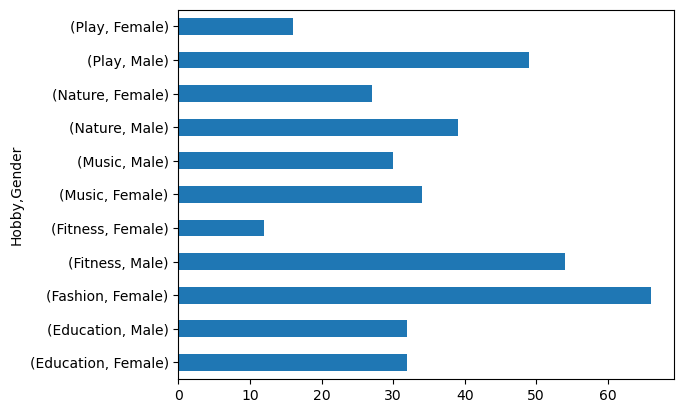

In [56]:
Combined_df.groupby('Hobby').Gender.value_counts().plot.barh()

In [82]:
Combined_df.pivot_table(index=['Gender','Hobby'],values='Catchphrase',aggfunc='count')

Catchphrase
Gender Hobby                 
Female Education           32
       Fashion             66
       Fitness             12
       Music               34
       Nature              27
       Play                16
Male   Education           32
       Fitness             54
       Music               30
       Nature              39
       Play                49

In [57]:
species_wallpaper = Combined_df.groupby('Species').count()['Wallpaper'].to_frame().reset_index().sort_values('Wallpaper', ascending = False)

In [58]:
species_wallpaper

,Species,Wallpaper
5,Cat,23
29,Rabbit,20
32,Squirrel,18
14,Frog,18
11,Duck,17
10,Dog,16
8,Cub,16
19,Horse,15
28,Pig,15
24,Mouse,15


In [59]:
species_floor = Combined_df.groupby('Species').count()['Flooring'].to_frame().reset_index().sort_values('Flooring', ascending = False)
species_floor

,Species,Flooring
5,Cat,23
29,Rabbit,20
32,Squirrel,18
14,Frog,18
11,Duck,17
10,Dog,16
8,Cub,16
19,Horse,15
28,Pig,15
24,Mouse,15


In [79]:
filtered_df = Combined_df[Combined_df.Species == 'Cat']

pivot_table = filtered_df.pivot_table(index=['Species','Gender'], values='Catchphrase', aggfunc='count')

pivot_table

Catchphrase
Species Gender             
Cat     Female           14
        Male              9

Text(0, 0.5, 'Number of Shoppers ')

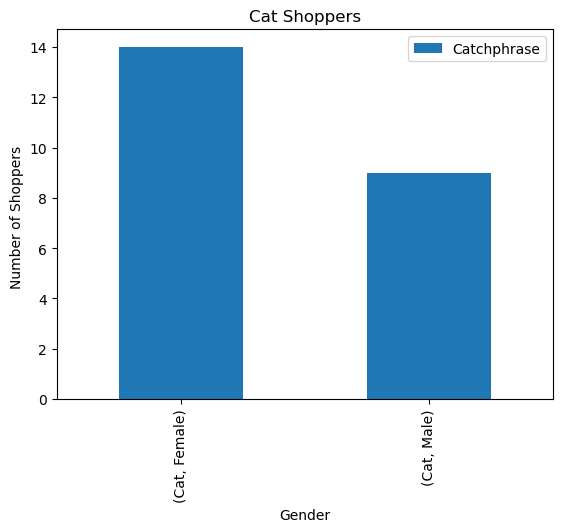

In [80]:

pivot_table.plot(kind='bar')
plt.title("Cat Shoppers")
plt.xlabel('Gender')
plt.ylabel('Number of Shoppers ')

In [60]:
# We now know that Cats are the largest purchasers of wallpaper and Flooring. 
# Do they correlate to purchases of Backyard Wall paper & Backyard Lawns?
# also look at the next top 5 

In [63]:
Shopping_Flooring = Combined_df.pivot_table(index=['Gender','Source_Floor'], values=['Catchphrase'],aggfunc='count')
Shopping_Flooring

Catchphrase
Gender Source_Floor              
Female Crafting                20
       Nook's Cranny          143
       Saharah                 24
Male   Crafting                40
       Nook's Cranny          110
       Saharah                 54

Text(0, 0.5, 'Number of Shoppers ')

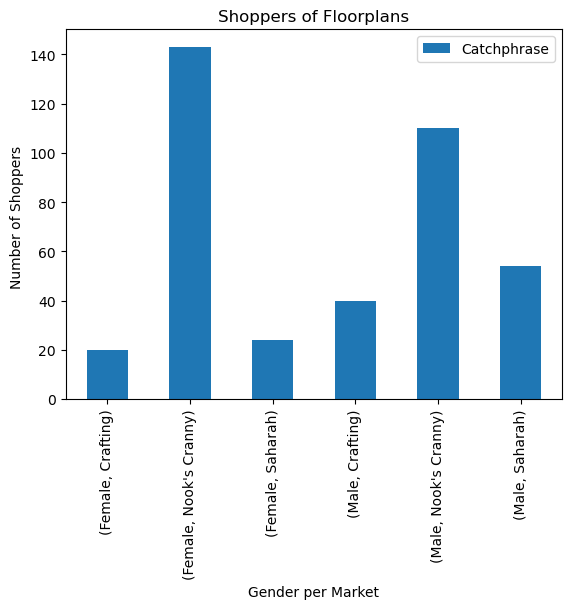

In [64]:
Shopping_Flooring.plot(kind='bar')
plt.title("Shoppers of Floorplans")
plt.xlabel('Gender per Market')
plt.ylabel('Number of Shoppers ')

In [65]:
# We can see that Tom Nook is taking the lead in Floorings sold for both Female and Male shoppers

In [69]:
Shopping_Wallpaper = Combined_df.pivot_table(index=['Gender','Source_Wallpaper'],values=['Catchphrase'],aggfunc='count')
Shopping_Wallpaper

Catchphrase
Gender Source_Wallpaper             
Female Crafting                   30
       Nook's Cranny             114
       Saharah                    43
Male   Crafting                   63
       Nook's Cranny              75
       Saharah                    66

Text(0, 0.5, 'Number of Shoppers ')

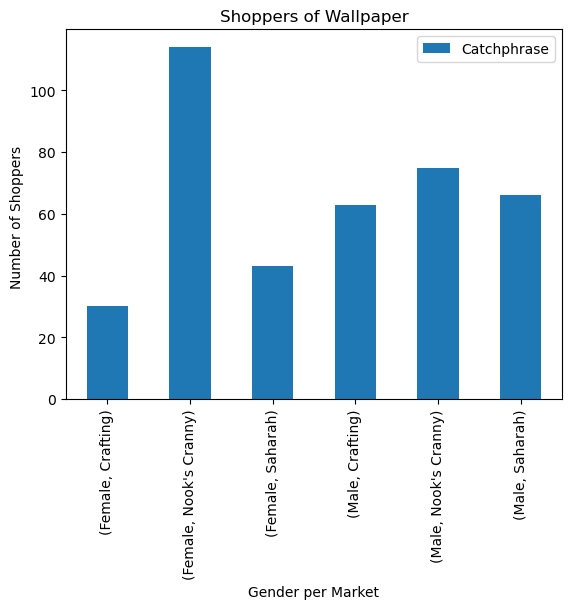

In [70]:
Shopping_Wallpaper.plot(kind='bar')
plt.title("Shoppers of Wallpaper")
plt.xlabel('Gender per Market')
plt.ylabel('Number of Shoppers ')

In [ ]:
# Most female shoppers go to Nook's Cranny. 
# Male shoppers almost equally are divided between crafting their own wall paper, shopping at Nook's Cranny and Saharah


# Conclusion

In [84]:
# I have a gut feeling that Tom Nook should purchase furniture 
# that cater towards the ladies and/or Cats that demand the outdoor based wallpaper and flooring. 
# Also make sure the furniture can to a degree satisfy the fashionable lifestyle category
# I will go ahead and transfer the merged documents to Excel followed by PowerBI for further exploration and visualization

# Combined_df.to_excel(r"C:\Users\carlo\OneDrive\Documents\My Data Analytics Projects\Animal Crossing\Animal Crossing Tom Nook Business Project\Combined_Villagers.xlsx", index=False)